In [357]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [358]:
pd.set_option('display.max_colwidth', None)

In [359]:
# Read in the policies training dataset
policy_df = pd.read_csv(f"ITCS6100_training_dataset/training_data.csv")
print(set(policy_df.dtypes.tolist()))

/var/folders/r3/3m52j7cj2y39r9kd3t312jzr0000gn/T/ipykernel_7413/2777155575.py:2: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  policy_df = pd.read_csv(f"ITCS6100_training_dataset/training_data.csv")


{dtype('float64'), dtype('int64'), dtype('O')}


In [360]:
# Create dataframe with only numerical attributes in the original dataframe
policy_df_num = policy_df.select_dtypes(include= ['int64', 'float64'])
policy_df_num

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,6,35,2004,-1,11,1,-1,5,3,...,1,0,22.7,2006,320.12,0,0.0,0.0,0.0,0.0
1,164533241,6,35,1980,-1,11,1,-1,5,9,...,1,0,47.1,2006,259.70,0,0.0,0.0,0.0,0.0
2,164534633,6,17,2005,-1,10,1,-1,5,2,...,1,0,47.2,2006,613.74,0,0.0,0.0,0.0,0.0
3,164534839,6,17,2005,-1,12,1,-1,5,2,...,1,0,46.7,2006,541.66,0,0.0,0.0,0.0,0.0
4,164534840,6,17,2005,-1,12,1,-1,5,2,...,1,0,47.2,2006,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,381713000,6,35,1999,-1,8,2,-1,5,9,...,0,0,0.0,2006,162.55,0,0.0,0.0,0.0,0.0
424427,381735600,6,31,2000,-1,8,2,-1,5,8,...,0,0,0.0,2006,117.13,0,0.0,0.0,0.0,0.0
424428,382057400,6,35,1997,-1,8,1,-1,5,9,...,0,0,0.0,2006,118.21,0,0.0,0.0,0.0,0.0
424429,382162500,6,31,1998,-1,17,1,-1,5,9,...,0,0,0.0,2006,103.93,0,0.0,0.0,0.0,0.0


In [361]:
#IDentify numerical features correlated with Loss_Ration column
policy_df_num_corr = policy_df_num.corr()['Loss_Ratio'][:-1] 
policy_df_num_corr

PolicyNo                                    0.003051
Policy_Installment_Term                     0.000054
Vehicle_Territory                          -0.003306
Vehicle_Make_Year                           0.002206
Vehicle_New_Cost_Amount                    -0.000493
Vehicle_Symbol                              0.001186
Vehicle_Number_Of_Drivers_Assigned         -0.002467
Vehicle_Miles_To_Work                      -0.001067
Vehicle_Days_Per_Week_Driven                0.000005
Vehicle_Age_In_Years                       -0.001998
Vehicle_Med_Pay_Limit                      -0.000623
Vehicle_Physical_Damage_Limit               0.000646
Vehicle_Comprehensive_Coverage_Limit       -0.000928
Vehicle_Collision_Coverage_Deductible      -0.000816
Driver_Total                                0.005764
Driver_Total_Male                          -0.000209
Driver_Total_Female                         0.003845
Driver_Total_Single                         0.002346
Driver_Total_Married                        0.

In [362]:
# Identify highly correlated numerical features 
max_corr_num_features = policy_df_num_corr[policy_df_num_corr > 0]
max_corr_num_features

PolicyNo                                  0.003051
Policy_Installment_Term                   0.000054
Vehicle_Make_Year                         0.002206
Vehicle_Symbol                            0.001186
Vehicle_Days_Per_Week_Driven              0.000005
Vehicle_Physical_Damage_Limit             0.000646
Driver_Total                              0.005764
Driver_Total_Female                       0.003845
Driver_Total_Single                       0.002346
Driver_Total_Married                      0.000652
Driver_Total_Related_To_Insured_Spouse    0.002180
Driver_Total_Related_To_Insured_Child     0.003962
Driver_Total_Licensed_In_State            0.005730
Driver_Total_Teenager_Age_15_19           0.005323
Driver_Total_College_Ages_20_23           0.001619
Driver_Total_Middle_Adult_Ages_40_49      0.000721
Driver_Total_Senior_Ages_65_69            0.008471
Driver_Total_Upper_Senior_Ages_70_plus    0.000822
Vehicle_Driver_Points                     0.001852
Claim_Count                    

In [363]:
# Create dataframe with only object attributes in the original dataframe
policy_df_cat = policy_df.select_dtypes(include= ['object'])
policy_df_cat.head()

,Policy_Company,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Make_Description,Vehicle_Performance,Vehicle_Usage,Vehicle_Annual_Miles,Vehicle_Anti_Theft_Device,...,Vehicle_Safe_Driver_Discount_Indicator,EEA_Liability_Coverage_Only_Indicator,EEA_Multi_Auto_Policies_Indicator,EEA_Policy_Zip_Code_3,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,SYS_Renewed,SYS_New_Business
0,Standard,Direct Billed to Insured,Pre-paid,N,43046,BUIK LESABRE LI,Standard,Farm,Unknown,Not Applicable,...,Y,N,N,430,Standard,N,Y,100-400,Y,N
1,Standard,Direct Billed to Insured,Pre-paid,N,Unknown,CADILLAC 4-DOOR,Standard,Farm,Unknown,Not Applicable,...,Y,N,N,Unknown,Preferred,N,Y,100-200,Y,N
2,Standard,Direct Billed to Insured,Pre-paid,N,43555,PONT MONTANA SV,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,N,435,Non-standard,N,Y,100-400,Y,N
3,Standard,Direct Billed to Insured,Pre-paid,N,43561,MERC GRAND MARQ,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,Y,435,Non-standard,Y,Y,40-100,Y,N
4,Standard,Direct Billed to Insured,Pre-paid,N,43561,MERC GRAND MARQ,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,Y,435,Non-standard,Y,Y,40-100,Y,N


In [364]:
# Encode the values of objects attributes to numerical values
policy_df_cat = policy_df_cat.replace({
    'Policy_Company' : {'Standard ' : 1, 'Preferred' : 2},
    'Policy_Billing_Code' : {'Direct Billed to Insured' : 1, 'Premium Finance' : 2},
    'Policy_Method_Of_Payment' : {'Pre-paid': 1, 'Installment': 2},
    'Policy_Reinstatement_Fee_Indicator' : {'N' : 0, 'Y' : 1},
    'Policy_Zip_Code_Garaging_Location' : {'Unknown' : -1},
    'Vehicle_Performance' : {'Standard' : 1, 'Intermediate' : 2, 'High' : 3, 'Sports' :4, 'Sports Premium' :5},
    'Vehicle_Usage' : {'Business' : 1, 'Farm    ' : 2, 'Pleasure': 3, 'Work    ': 4},
    'Vehicle_Anti_Theft_Device' : {'Not Applicable': -1, 'Unknown' : -1, 'Active Disabling': 1, 'Passive Disabling-Vehicle Recovery': 2, 'Alarm Only' : 3},
    'Vehicle_Passive_Restraint' : {'Y': 1, 'N': 0, 'Unknown': -1},
    'Vehicle_Comprehensive_Coverage_Indicator' : {'Y': 1, 'N': 0},
    'Vehicle_Collision_Coverage_Indicator' : {'Y': 1, 'N': 0},
    'Vehicle_Youthful_Driver_Indicator' : {'Y': 1, 'N': 0},
    'Vehicle_Youthful_Good_Student_Code' : {'Eligible for Good Student Credit    ': 1, 'Not Eligible for Good Student Credit': 0},
    'Vehicle_Youthful_Driver_Training_Code' : {'Not Applicable                 ': -1, 'With Driver Training           ' : 1, 'With or Without Driver Training' : 2, 'Without Driver Training        ' : 3},
    'Vehicle_Safe_Driver_Discount_Indicator' : {'N': 0, 'Y': 1},
    'EEA_Liability_Coverage_Only_Indicator' : {'N': 0, 'Y': 1},
    'EEA_Multi_Auto_Policies_Indicator' : {'N': 0, 'Y': 1},
    'EEA_Policy_Zip_Code_3' : {'Unknown' : -1},
    'EEA_Agency_Type' : {'Hybrid': 1, 'Non-standard': 2, 'Preferred' : 3, 'Standard' : 4},
    'EEA_Packaged_Policy_Indicator' : {'N': 0, 'Y': 1},
    'EEA_Full_Coverage_Indicator' : {'N': 0, 'Y': 1},
    'SYS_Renewed' : {'N': 0, 'Y': 1},
    'SYS_New_Business' : {'N': 0, 'Y': 1}
})
pd.to_numeric(policy_df_cat['Policy_Zip_Code_Garaging_Location'])
pd.to_numeric(policy_df_cat['Vehicle_Anti_Theft_Device'])
pd.to_numeric(policy_df_cat['Vehicle_Passive_Restraint'])
pd.to_numeric(policy_df_cat['Vehicle_Youthful_Driver_Training_Code'])
pd.to_numeric(policy_df_cat['EEA_Policy_Zip_Code_3'])

0         430
1          -1
2         435
3         435
4         435
         ... 
424426    428
424427    436
424428    424
424429    433
424430    439
Name: EEA_Policy_Zip_Code_3, Length: 424431, dtype: int64

In [365]:
# Split the range in Vehicle_Bodily_Injury_Limit column into minimum and maximum limit
policy_df_cat[['Vehicle_Bodily_Injury_Limit_min_limit', 'Vehicle_Bodily_Injury_Limit_max_limit']] = policy_df_cat['Vehicle_Bodily_Injury_Limit'].str.split('-', expand=True)

# Convert the minimum and maximum values to numeric
policy_df_cat['Vehicle_Bodily_Injury_Limit_min_limit'] = pd.to_numeric(policy_df_cat['Vehicle_Bodily_Injury_Limit_min_limit'], errors='coerce')
policy_df_cat['Vehicle_Bodily_Injury_Limit_max_limit'] = pd.to_numeric(policy_df_cat['Vehicle_Bodily_Injury_Limit_max_limit'], errors='coerce')

# Calculate the mean of minimum and maximum of Vehicle_Bodily_Injury_Limit
min_limit_mean_1 = policy_df_cat['Vehicle_Bodily_Injury_Limit_min_limit'][policy_df_cat['Vehicle_Bodily_Injury_Limit_min_limit'].notna()].mean()
max_limit_mean_1 = policy_df_cat['Vehicle_Bodily_Injury_Limit_max_limit'][policy_df_cat['Vehicle_Bodily_Injury_Limit_max_limit'].notna()].mean()

# Replace the NA values with the mean of minimu and maximum
policy_df_cat['Vehicle_Bodily_Injury_Limit_min_limit'].fillna(min_limit_mean_1, inplace=True)
policy_df_cat['Vehicle_Bodily_Injury_Limit_max_limit'].fillna(max_limit_mean_1, inplace=True)

# Drop the original column Vehicle_Bodily_Injury_Limit
policy_df_cat.drop('Vehicle_Bodily_Injury_Limit', axis=1, inplace=True)

In [366]:
# Split the range in Vehicle_Bodily_Injury_Limit column into minimum and maximum limit
policy_df_cat[['EEA_Prior_Bodily_Injury_min_limit', 'EEA_Prior_Bodily_Injury_max_limit']] = policy_df_cat['EEA_Prior_Bodily_Injury_Limit'].str.split('-', expand=True)

# Convert the minimum and maximum values to numeric
policy_df_cat['EEA_Prior_Bodily_Injury_min_limit'] = pd.to_numeric(policy_df_cat['EEA_Prior_Bodily_Injury_min_limit'], errors='coerce')
policy_df_cat['EEA_Prior_Bodily_Injury_max_limit'] = pd.to_numeric(policy_df_cat['EEA_Prior_Bodily_Injury_max_limit'], errors='coerce')

# Calculate the mean of minimum and maximum of EEA_Prior_Bodily_Injury_Limit
min_limit_mean_2 = policy_df_cat['EEA_Prior_Bodily_Injury_min_limit'][policy_df_cat['EEA_Prior_Bodily_Injury_min_limit'].notna()].mean()
max_limit_mean_2 = policy_df_cat['EEA_Prior_Bodily_Injury_max_limit'][policy_df_cat['EEA_Prior_Bodily_Injury_max_limit'].notna()].mean()

# Replace the NA values with the mean of minimu and maximum
policy_df_cat['EEA_Prior_Bodily_Injury_min_limit'].fillna(min_limit_mean_2, inplace=True)
policy_df_cat['EEA_Prior_Bodily_Injury_max_limit'].fillna(max_limit_mean_2, inplace=True)

# Drop the original column EEA_Prior_Bodily_Injury_Limit
policy_df_cat.drop('EEA_Prior_Bodily_Injury_Limit', axis=1, inplace=True)

In [367]:
policy_df_cat = policy_df_cat.drop('Vehicle_Make_Description', axis=1)
policy_df_cat = policy_df_cat.drop('Vehicle_Annual_Miles', axis=1)
policy_df_cat.keys()

Index(['Policy_Company', 'Policy_Billing_Code', 'Policy_Method_Of_Payment',
       'Policy_Reinstatement_Fee_Indicator',
       'Policy_Zip_Code_Garaging_Location', 'Vehicle_Performance',
       'Vehicle_Usage', 'Vehicle_Anti_Theft_Device',
       'Vehicle_Passive_Restraint', 'Vehicle_Comprehensive_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Indicator',
       'Vehicle_Youthful_Driver_Indicator',
       'Vehicle_Youthful_Driver_Training_Code',
       'Vehicle_Youthful_Good_Student_Code',
       'Vehicle_Safe_Driver_Discount_Indicator',
       'EEA_Liability_Coverage_Only_Indicator',
       'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3',
       'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator',
       'EEA_Full_Coverage_Indicator', 'SYS_Renewed', 'SYS_New_Business',
       'Vehicle_Bodily_Injury_Limit_min_limit',
       'Vehicle_Bodily_Injury_Limit_max_limit',
       'EEA_Prior_Bodily_Injury_min_limit',
       'EEA_Prior_Bodily_Injury_max_limit'],
      dtype=

In [368]:
# Concatenate both numerical and object dataframe into one
policy_df_con = pd.concat([policy_df_num, policy_df_cat], axis=1)
policy_df_con.head()
# print(policy_df_con.keys())
#Find the correlation of features with Loss_Ratio
policy_df_corr_feat = policy_df_con.corr()['Loss_Ratio'][:-1] 
# print(policy_df_corr_feat)
# Select the features based on the correlation factor
max_corr_features = policy_df_corr_feat[policy_df_corr_feat>0.002]
min_corr_features = policy_df_corr_feat[policy_df_corr_feat<-0.002]
print('positively correlated featues \n', max_corr_features)
print('negatively correlated \n', min_corr_features)

#Find the correlation of features
policy_df_corr = policy_df_con.corr()

positively correlated featues 
 PolicyNo                                  0.003051
Vehicle_Make_Year                         0.002206
Driver_Total                              0.005764
Driver_Total_Female                       0.003845
Driver_Total_Single                       0.002346
Driver_Total_Related_To_Insured_Spouse    0.002180
Driver_Total_Related_To_Insured_Child     0.003962
Driver_Total_Licensed_In_State            0.005730
Driver_Total_Teenager_Age_15_19           0.005323
Driver_Total_Senior_Ages_65_69            0.008471
Claim_Count                               0.092929
Loss_Amount                               0.578532
Frequency                                 0.371274
Severity                                  0.585348
Loss_Ratio                                1.000000
Vehicle_Performance                       0.004082
Vehicle_Anti_Theft_Device                 0.002184
Vehicle_Passive_Restraint                 0.002380
Vehicle_Youthful_Driver_Indicator         0.004751

<AxesSubplot:>

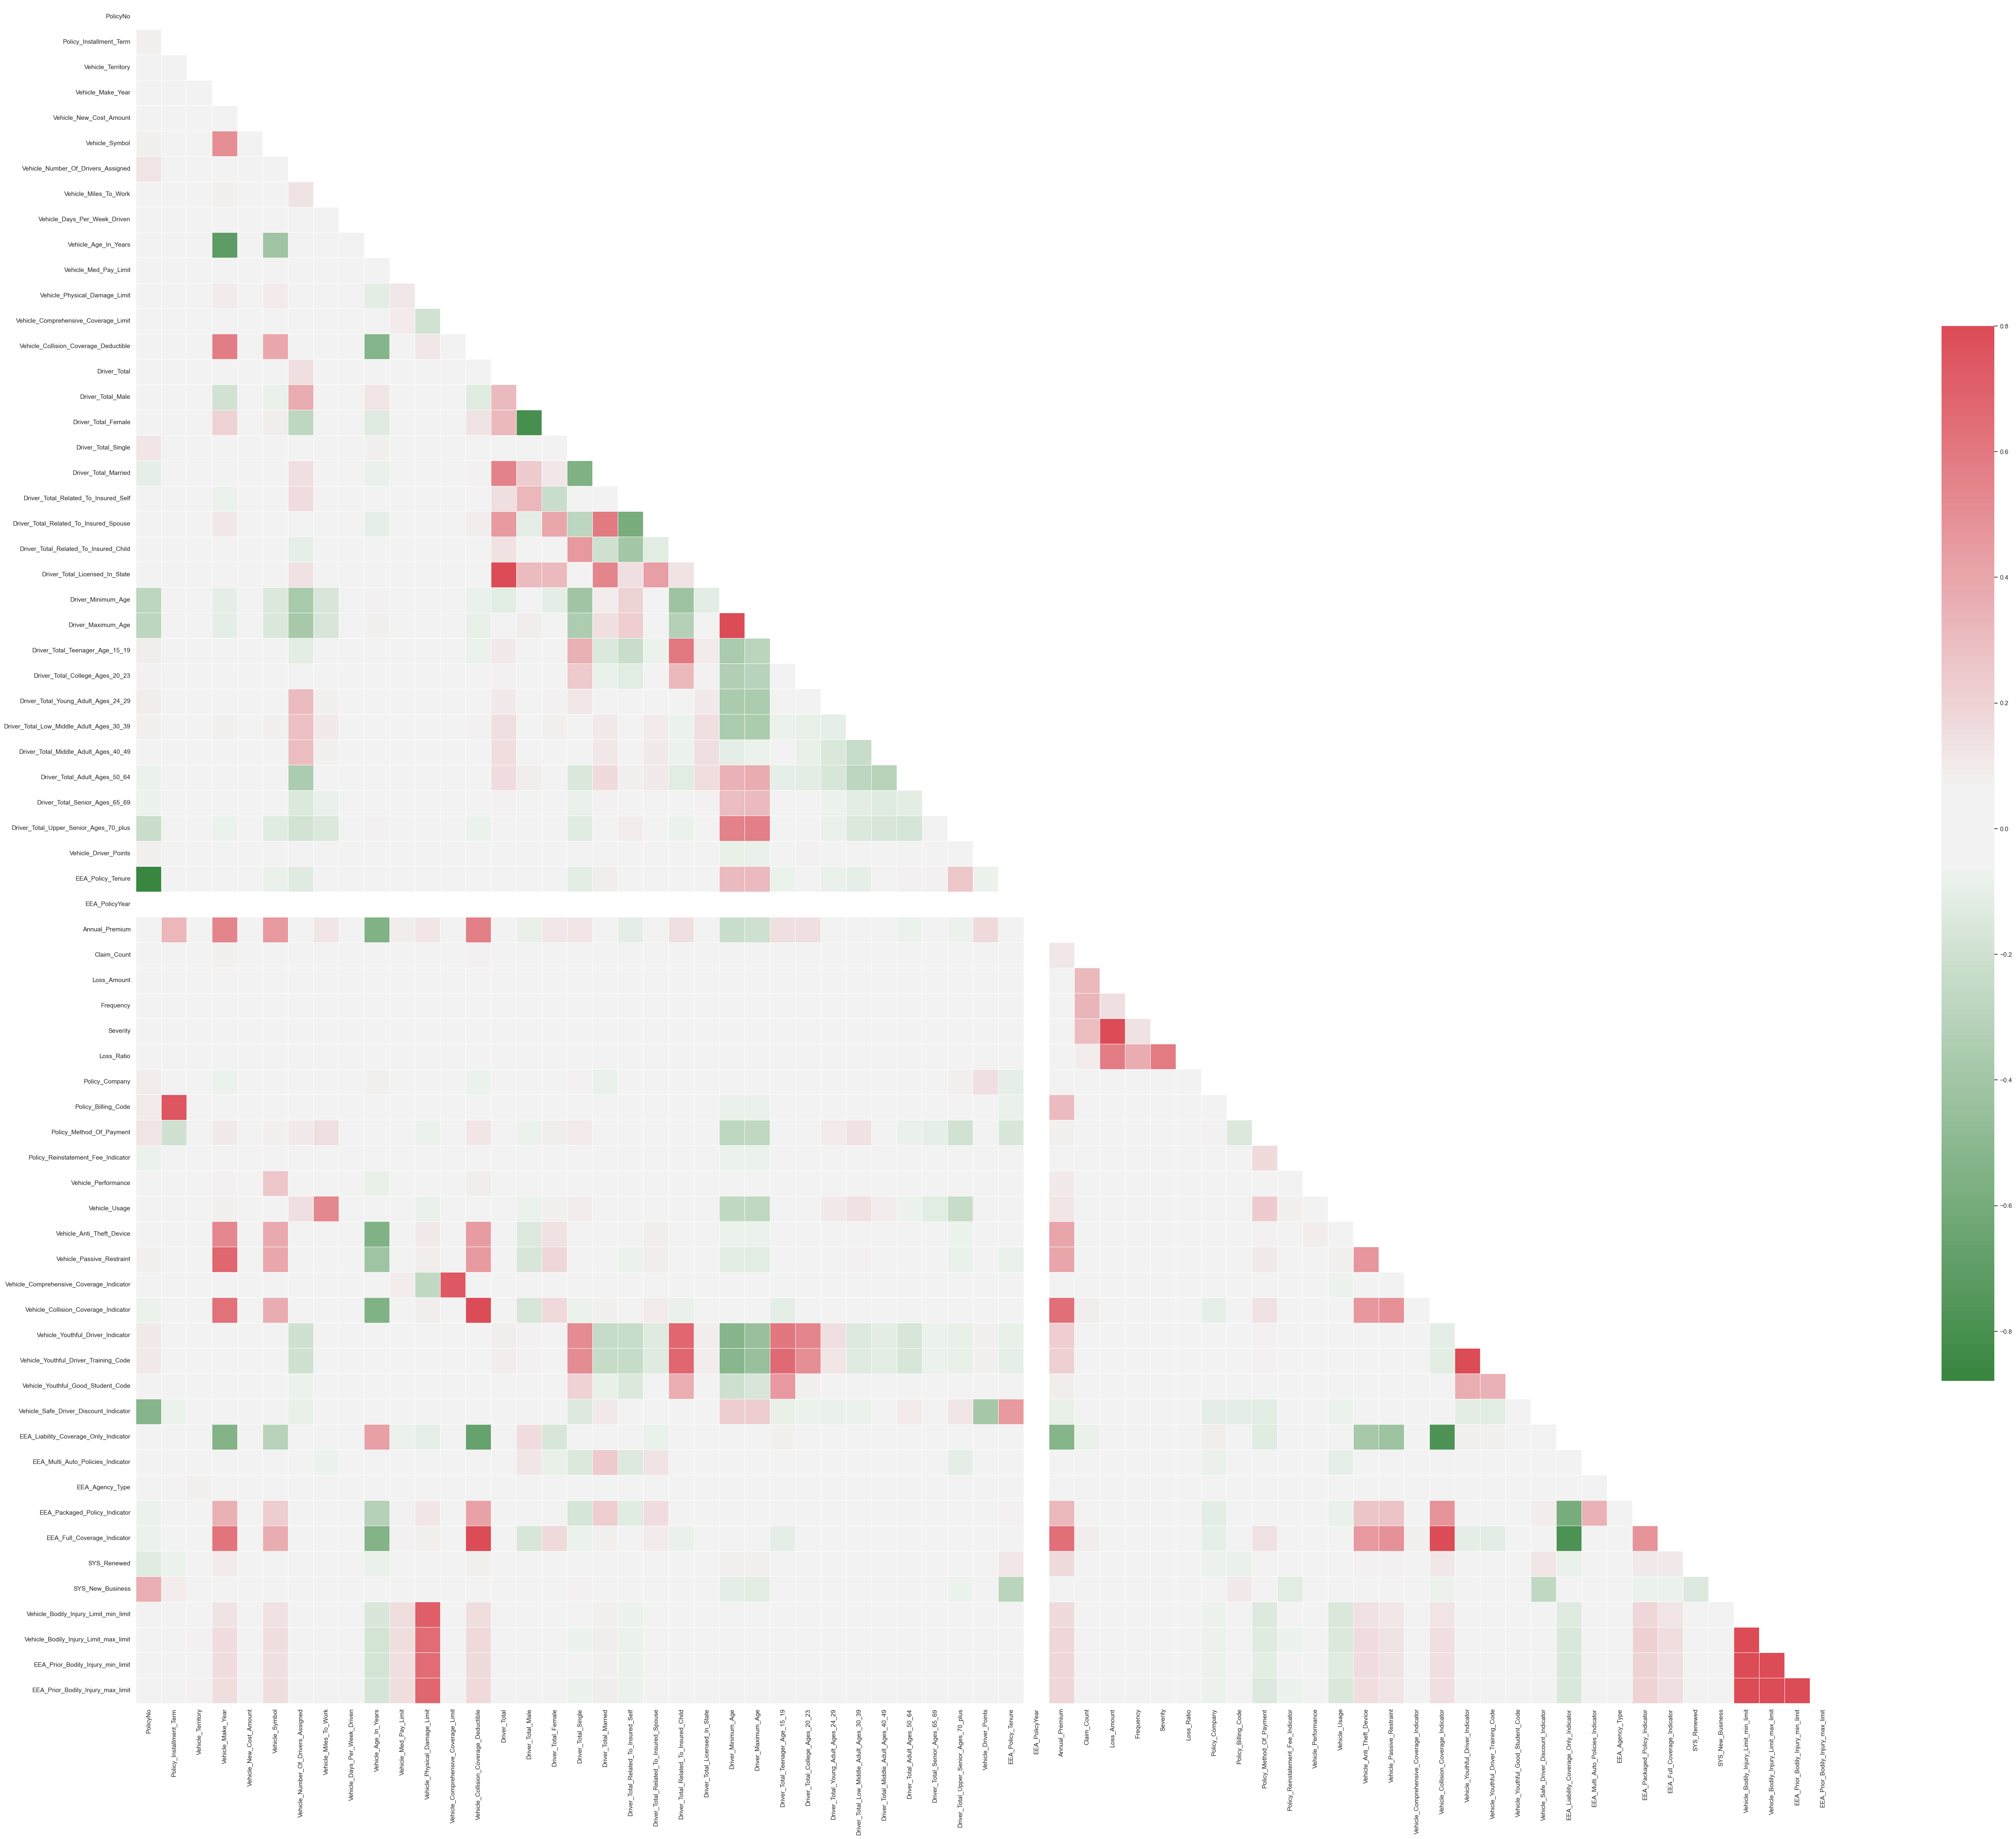

In [377]:
# Generate a mask for the upper triangle
mask = np.zeros_like(policy_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(67, 67))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(130, 10, sep=20, as_cmap=True)

# Draw the diagonal correlation map
sns.heatmap(policy_df_corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [378]:
selected_features = ['PolicyNo',
                     'Vehicle_Make_Year',
                     'Driver_Total',
                     'Driver_Total_Female', 
                     'Driver_Total_Single',
                     'Driver_Total_Related_To_Insured_Spouse' ,
                     'Driver_Total_Related_To_Insured_Child', 
                     'Driver_Total_Licensed_In_State',
                     'Driver_Total_Teenager_Age_15_19', 
                     'Driver_Total_Senior_Ages_65_69', 
                     'Claim_Count',
                     'Loss_Amount' ,
                     'Frequency', 
                     'Severity',
                     'Vehicle_Performance' ,
                     'Vehicle_Anti_Theft_Device' ,
                     'Vehicle_Passive_Restraint',
                     'Vehicle_Youthful_Driver_Indicator' ,
                     'Vehicle_Youthful_Driver_Training_Code' ,
                     'Vehicle_Youthful_Good_Student_Code',
                     'SYS_New_Business',
                     'Vehicle_Territory',
                     'Vehicle_Number_Of_Drivers_Assigned',
                     'Driver_Total_Adult_Ages_50_64' ,
                     'EEA_Policy_Tenure',
                     'Annual_Premium',
                     'Vehicle_Safe_Driver_Discount_Indicator',
                     'SYS_Renewed']

# Create dataframe with all the selected features
policy_df = policy_df[selected_features]
policy_df.head()

,PolicyNo,Vehicle_Make_Year,Driver_Total,Driver_Total_Female,Driver_Total_Single,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Total_Teenager_Age_15_19,Driver_Total_Senior_Ages_65_69,...,Vehicle_Youthful_Driver_Training_Code,Vehicle_Youthful_Good_Student_Code,SYS_New_Business,Vehicle_Territory,Vehicle_Number_Of_Drivers_Assigned,Driver_Total_Adult_Ages_50_64,EEA_Policy_Tenure,Annual_Premium,Vehicle_Safe_Driver_Discount_Indicator,SYS_Renewed
0,164532941,2004,1,1,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,35,1,0,22.7,320.12,Y,Y
1,164533241,1980,1,1,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,35,1,0,47.1,259.70,Y,Y
2,164534633,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,47.2,613.74,Y,Y
3,164534839,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,46.7,541.66,Y,Y
4,164534840,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,47.2,541.66,Y,Y


In [379]:
def get_num_cat_feat(df_dataset, df_columns):
    cat_feat = [column for column in df_columns if df_dataset[column].dtype == 'object']
    num_feat = [column for column in df_columns if df_dataset[column].dtype != 'object']
    return num_feat, cat_feat

In [380]:
def strip_white_spaces(input_df):
    str_cols = input_df.select_dtypes(include=['object']).columns
    input_df[str_cols] = input_df[str_cols].apply(lambda x: x.str.strip())
    return input_df

In [381]:
num_feat, cat_feat = get_num_cat_feat(policy_df, list(policy_df.columns))

In [382]:
num_feat

['PolicyNo',
 'Vehicle_Make_Year',
 'Driver_Total',
 'Driver_Total_Female',
 'Driver_Total_Single',
 'Driver_Total_Related_To_Insured_Spouse',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Total_Licensed_In_State',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_Senior_Ages_65_69',
 'Claim_Count',
 'Loss_Amount',
 'Frequency',
 'Severity',
 'Vehicle_Territory',
 'Vehicle_Number_Of_Drivers_Assigned',
 'Driver_Total_Adult_Ages_50_64',
 'EEA_Policy_Tenure',
 'Annual_Premium']

In [383]:
cat_feat

['Vehicle_Performance',
 'Vehicle_Anti_Theft_Device',
 'Vehicle_Passive_Restraint',
 'Vehicle_Youthful_Driver_Indicator',
 'Vehicle_Youthful_Driver_Training_Code',
 'Vehicle_Youthful_Good_Student_Code',
 'SYS_New_Business',
 'Vehicle_Safe_Driver_Discount_Indicator',
 'SYS_Renewed']

In [384]:
policy_df = strip_white_spaces(policy_df)
policy_df.head()

,PolicyNo,Vehicle_Make_Year,Driver_Total,Driver_Total_Female,Driver_Total_Single,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Total_Teenager_Age_15_19,Driver_Total_Senior_Ages_65_69,...,Vehicle_Youthful_Driver_Training_Code,Vehicle_Youthful_Good_Student_Code,SYS_New_Business,Vehicle_Territory,Vehicle_Number_Of_Drivers_Assigned,Driver_Total_Adult_Ages_50_64,EEA_Policy_Tenure,Annual_Premium,Vehicle_Safe_Driver_Discount_Indicator,SYS_Renewed
0,164532941,2004,1,1,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,35,1,0,22.7,320.12,Y,Y
1,164533241,1980,1,1,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,35,1,0,47.1,259.70,Y,Y
2,164534633,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,47.2,613.74,Y,Y
3,164534839,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,46.7,541.66,Y,Y
4,164534840,2005,1,0,0,0,0,1,0,0,...,Not Applicable,Not Eligible for Good Student Credit,N,17,1,0,47.2,541.66,Y,Y


In [386]:
# Calculate the total number of policies in the dataset
total_policies = len(policy_df)

# Calculate the number of portfolios needed to accommodate all the policies
num_portfolios = int(total_policies / 1000) + 1

# Filter policies with non-zero loss amount
policy_df_loss = policy_df[policy_df['Loss_Amount'] > 0]

# Shuffle the dataset randomly
policy_df = policy_df.sample(frac=1)

for i in range(num_portfolios):
    # Sample 100 policies with non-zero loss amount
    policy_df_sample = policy_df_loss.sample(n=100, random_state=i)
    # Sample remaining 900 policies without loss
    policy_df_no_loss = policy_df[policy_df['Loss_Amount'] == 0].sample(n=900, random_state=i)
     # Concatenate the two samples
    portfolio_df = pd.concat([policy_df_sample, policy_df_no_loss])
    portfolio_df = portfolio_df.sample(frac=1)
    # Save the portfolio to CSV file
    portfolio_df.to_csv(f'ITCS6100_training_dataset/training_portfolios/portfolio_{i+1}.csv', index=False)


print(f"{num_portfolios} portfolios created.")

425 portfolios created.
